# How to store state information

## Option 1: global variables 

One option is to use a global variable. Note that you need to state that you want to use the `global` state variable in the function.

The agent in this example tries to move always to the next position if it receives the percept that the way is not blocked. Its actions are "stay" or "advance". The agent stores its own position in a global state variable.

In [34]:
import numpy as np

# the state consists of two variables. I use the prefix state_
state_position = 0
state_name = "The Agent"

def agent_program(percept_blocked):
    global state_position
    global state_name
    
    print("    ", state_name, ": My percept_blocked is", percept_blocked, "and I am now in position", state_position)
    
    if percept_blocked: return("stay")
        
    state_position = state_position + 1
    
    print("    ", state_name, ": I advance to position", state_position) 
    
    return("advance")

The environment may have its own state and produces. __Note:__ The agent and the environment do not share any variables (each has its own position variable) and only communicate with percepts and actions!

In [35]:
def agent_environment(agent_act, n):   
    agent_position = 0
    
    for i in range(n): 
        print("Step", i)
        
        blocked = np.random.choice([True, False])
        
        print("  Environment: Agent's action is in position", agent_position, "and is blocked", blocked)
        
        action = agent_act(percept_blocked = blocked)
        
        print("  Environment: Agent's action is", action)
        
        if action == "advance" and not blocked:
            agent_position = agent_position + 1
            
        print("  Environment: Agent is now in position", agent_position)
        
agent_environment(agent_program, 5)

Step 0
  Environment: Agent's action is in position 0 and is blocked False
     The Agent : My percept_blocked is False and I am now in position 0
     The Agent : I advance to position 1
  Environment: Agent's action is advance
  Environment: Agent is now in position 1
Step 1
  Environment: Agent's action is in position 1 and is blocked True
     The Agent : My percept_blocked is True and I am now in position 1
  Environment: Agent's action is stay
  Environment: Agent is now in position 1
Step 2
  Environment: Agent's action is in position 1 and is blocked False
     The Agent : My percept_blocked is False and I am now in position 1
     The Agent : I advance to position 2
  Environment: Agent's action is advance
  Environment: Agent is now in position 2
Step 3
  Environment: Agent's action is in position 2 and is blocked True
     The Agent : My percept_blocked is True and I am now in position 2
  Environment: Agent's action is stay
  Environment: Agent is now in position 2
Step 4
 

__Note:__ The down-side is that you can only have one agent since the global variables are shared!


## Option 2: Using a class

This is the more flexible option. You can create and work with multiple agents at the same time and there is no need for global variables.

In [36]:
class Agent:
    def __init__(self, initial_position = 0, name = "An Agent"):
        self.position = initial_position
        self.name = name
    
    def act(self, percept_blocked):
        print("    ", self.name, ": My percept_blocked is", percept_blocked, "and I am now in position", self.position)
    
        if percept_blocked: return("stay")
        
        self.position = self.position + 1
        
        print("    ", self.name, ": I advance to position", self.position)  
        
        return("advance")

Step 0
  Environment: Agent's action is in position 0 and is blocked True
     Agent 1 : My percept_blocked is True and I am now in position 0
  Environment: Agent's action is stay
  Environment: Agent is now in position 0
Step 1
  Environment: Agent's action is in position 0 and is blocked False
     Agent 1 : My percept_blocked is False and I am now in position 0
     Agent 1 : I advance to position 1
  Environment: Agent's action is advance
  Environment: Agent is now in position 1
Step 2
  Environment: Agent's action is in position 1 and is blocked True
     Agent 1 : My percept_blocked is True and I am now in position 1
  Environment: Agent's action is stay
  Environment: Agent is now in position 1
Step 3
  Environment: Agent's action is in position 1 and is blocked True
     Agent 1 : My percept_blocked is True and I am now in position 1
  Environment: Agent's action is stay
  Environment: Agent is now in position 1
Step 4
  Environment: Agent's action is in position 1 and is blo

The environment does not change. We just supply the function (method) that implements the agent program.

In [37]:
agent_1 = Agent(name = "Agent 1") 
agent_environment(agent_1.act, 5)

Step 0
  Environment: Agent's action is in position 0 and is blocked False
     Agent 1 : My percept_blocked is False and I am now in position 0
     Agent 1 : I advance to position 1
  Environment: Agent's action is advance
  Environment: Agent is now in position 1
Step 1
  Environment: Agent's action is in position 1 and is blocked False
     Agent 1 : My percept_blocked is False and I am now in position 1
     Agent 1 : I advance to position 2
  Environment: Agent's action is advance
  Environment: Agent is now in position 2
Step 2
  Environment: Agent's action is in position 2 and is blocked False
     Agent 1 : My percept_blocked is False and I am now in position 2
     Agent 1 : I advance to position 3
  Environment: Agent's action is advance
  Environment: Agent is now in position 3
Step 3
  Environment: Agent's action is in position 3 and is blocked False
     Agent 1 : My percept_blocked is False and I am now in position 3
     Agent 1 : I advance to position 4
  Environment: 

# Random numbers

Random number generators are defined in package `numpy`. See: https://numpy.org/doc/stable/reference/random/

The following example throws a fair coin where `True` represents head and `False` is tail (i.e., head is false).

In [31]:
import numpy as np  

# initialize a new random number generator
rng = np.random.default_rng()

p = .5

for i in range(5): print(rng.random() < p)

False
True
True
True
True


A useful function is `random.choice`.

In [5]:
rng.choice([True, False], size = 5, p = [p, 1-p])

array([False,  True, False, False,  True])

# Multi-dimensional arrays

Package `numpy` provides a convenient way to work with multi-dimensional arrays.

In [66]:
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr)

[[1 2 3]
 [4 5 6]]


In [67]:
# access values using row and column index
arr[0, 0]

1

In [68]:
# sum all elements of the array
np.sum(arr)

21

In [69]:
# dot product
np.dot([1, 2], arr)

array([ 9, 12, 15])

In [70]:
# reshape array dimenstions
newarr = arr.reshape(3, 2)
newarr

array([[1, 2],
       [3, 4],
       [5, 6]])

# Charts

`matplotlib` can be used to create simple charts (histograms, line charts, etc.). See: https://matplotlib.org/

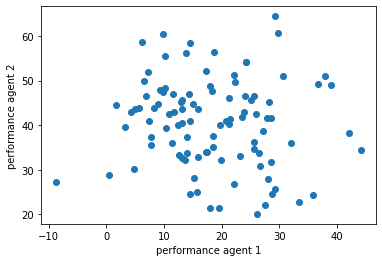

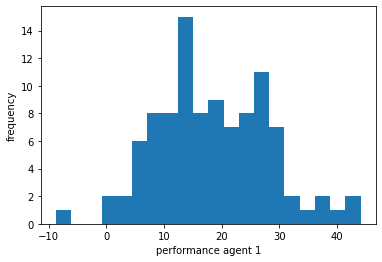

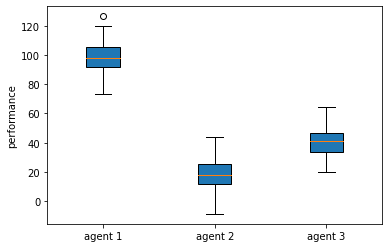

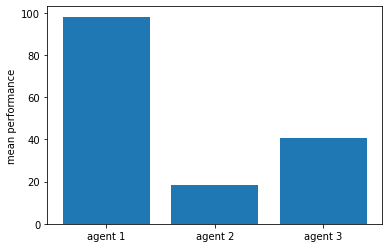

In [35]:
# create some random performance data for 3 agents and 100 runs
import numpy as np  

performance = [np.random.normal(mean, 10, size=100) for mean in [100, 20, 40]]
labels = ['agent 1', 'agent 2', 'agent 3']


# plot
import matplotlib.pyplot as plt

# scatter plot
x = performance[1]
y = performance[2]
plt.scatter(x, y) 
plt.xlabel("performance agent 1")
plt.ylabel("performance agent 2")
plt.show()

# histogram
plt.hist(x, bins = 20)
plt.xlabel("performance agent 1")
plt.ylabel("frequency")
plt.show()

# box plot 
bplot = plt.boxplot(performance,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
plt.ylabel("performance")
plt.show()


# bar plot
mean_performance = np.mean(performance, axis = 1)

plt.bar(labels, mean_performance)
plt.ylabel("mean performance")
plt.show()




# Tables

Markdown tables can be produced using markdown syntax (see https://www.markdownguide.org/extended-syntax/):

```
| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |
```

Here is the resulting table

| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |

Tables in code can be printed in several ways. The easiest is to use `pandas` dataframes. Unfortunately, it cannot print custom row names.

In [13]:
import numpy as np

data = np.array([[1, 2], [3 ,4], [5, 6]])

print(data)



[[1 2]
 [3 4]
 [5 6]]


In [17]:
import pandas as pd
pd.DataFrame(data, columns=["x", "y"])

,x,y
0,1,2
1,3,4
2,5,6


# Executing R code from a Python Notebook

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


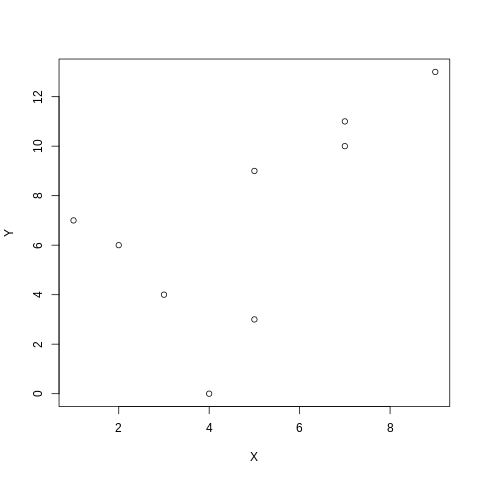

In [26]:
%load_ext rpy2.ipython

import pandas as pd 

df = pd.DataFrame({
'Letter': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]
})

%R -i df plot(df[, c("X", "Y")])
